In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import vtk

In [47]:
yhalf = 0.1/2
xcrack = 0.04
ycrack = 0.05
n = 16

In [48]:
xarea = np.array([0,0.1,0.1,0,0])
yarea = np.array([0,0,0.1,0.1,0])

In [49]:
xareaPD = np.array([0.04,0.1,0.1,0.04,0.04])
yareaPD = np.array([0.03,0.03,0.07,0.07,0.03])

In [50]:
hy = yhalf/n
h = (yhalf-hy/2) / n
h 

0.00302734375

In [51]:
delta = 4 * h
delta

0.012109375

In [52]:
x = []
y = []
volume = []
for j in range(0,int(2*ycrack/h)+1):
    for i in range(0,3*n+5):
        x.append(0.02+i*h)
        y.append(0.05+j*h)
        if i == 0 or i == 3*n+4 or j == 0 or j == int(2*ycrack/h) :
            volume.append(h*h/2)
        else:
            volume.append(h*h)
        
    

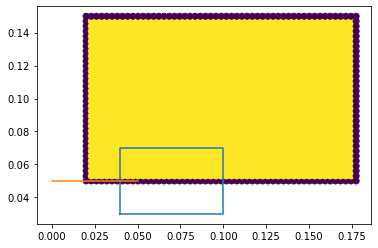

In [53]:
plt.plot(xareaPD,yareaPD)
plt.plot([0.,0.05],[0.05,0.05])
plt.scatter(x,y,c=volume)

In [12]:
min(x)

0.02

In [13]:
min(y)

0.05

In [14]:
max(x)

0.09871093750000001

In [15]:
max(y)

0.099951171875

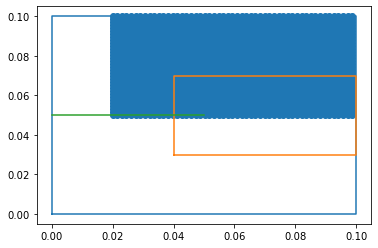

In [37]:
plt.plot(xarea,yarea)
plt.plot(xareaPD,yareaPD)
plt.plot([0.0,0.05],[0.05,0.05])
plt.scatter(x,y)

In [16]:
writer = vtk.vtkXMLUnstructuredGridWriter()
writer.SetFileName("coupling_"+str(n)+".vtu")
grid = vtk.vtkUnstructuredGrid()
points = vtk.vtkPoints()
points.SetNumberOfPoints(len(x))
points.SetDataTypeToDouble()

for i in range(0,len(x)):
    points.InsertPoint(i,x[i],y[i],0.)
    
grid.SetPoints(points)


dataOut = grid.GetPointData()
array = vtk.vtkDoubleArray()
array.SetName("Volumes")
array.SetNumberOfComponents(1)
array.SetNumberOfTuples(len(x))

for i in range(0,len(x)):
    array.SetTuple1(i,volume[i])
dataOut.AddArray(array)


writer.SetInputData(grid)
writer.GetCompressor().SetCompressionLevel(0)
writer.SetDataModeToAscii()
writer.Write()

1

In [17]:
%%bash 
ls

construct-aligned-mesh.ipynb
coupling_16.vtk
coupling_16.vtu
coupling_32.vtk
coupling_32.vtu
damage-11.png
force-20-damage.png
force-20-displacement.png
input-10.yaml
input-11.yaml
input-12.yaml
input-13.yaml
input-2.yaml
input-state.yaml
input.yaml
out-16-1
out-16-10
out-16-11
out-16-12
out-16-13
pum_mesh_coupling_16_sides_left_top_and_bottom_quasi_static_initial_force_as_at_time_11_micro_s.vtu
pum_mesh_coupling_16_sides_left_top_and_bottom_quasi_static_initial_force_as_at_time_12_micro_s.vtu
pum_mesh_coupling_16_sides_left_top_and_bottom_quasi_static_initial_force_as_at_time_13_micro_s.vtu
Untitled.ipynb


In [18]:
import meshio

In [19]:
points = []
cells = []
for i in range(0,len(x)):
    points.append([x[i],y[i],0])
    cells.append(("vertex", [[i]]))

In [20]:
mesh = meshio.Mesh(
    points,
    cells,
    # Optionally provide extra data on points, cells, etc.
    point_data={"Volume": volume},
    # Each item in cell data must match the cells array
)
mesh.write(
    "coupling_"+str(n)+".vtk",  # str, os.PathLike, or buffer/open file
    # file_format="vtk",  # optional if first argument is a path; inferred from extension
)

In [21]:
%%bash 
ls

construct-aligned-mesh.ipynb
coupling_16.vtk
coupling_16.vtu
coupling_32.vtk
coupling_32.vtu
damage-11.png
force-20-damage.png
force-20-displacement.png
input-10.yaml
input-11.yaml
input-12.yaml
input-13.yaml
input-2.yaml
input-state.yaml
input.yaml
out-16-1
out-16-10
out-16-11
out-16-12
out-16-13
pum_mesh_coupling_16_sides_left_top_and_bottom_quasi_static_initial_force_as_at_time_11_micro_s.vtu
pum_mesh_coupling_16_sides_left_top_and_bottom_quasi_static_initial_force_as_at_time_12_micro_s.vtu
pum_mesh_coupling_16_sides_left_top_and_bottom_quasi_static_initial_force_as_at_time_13_micro_s.vtu
Untitled.ipynb


In [22]:
mesh = meshio.read(
    "coupling_"+str(n)+".vtk",  # string, os.PathLike, or a buffer/open file
    # file_format="stl",  # optional if filename is a path; inferred from extension
    # see meshio-convert -h for all possible formats
)